In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('https://github.com/TyurinIvan/testTasks/blob/master/Analytical%20test%20task/Data%20base.xlsx?raw=true',
                    sheet_name='DataAnalytics').drop([0, 1, 7, 8, 9]).reset_index(drop=True)

In [3]:
df

,Разряд,Оклад,Коэффициент
0,3,12180.0,7.164706
1,4,14130.0,8.311765
2,5,16390.0,9.641176
3,6,19020.0,11.188235
4,7,22060.0,12.976471


In [4]:
skill = pd.DataFrame(df['Разряд'])
coefficient = pd.DataFrame(df['Коэффициент'])

In [5]:
skill.set_axis([0], axis='columns', inplace=True)
skill

,0
0,3
1,4
2,5
3,6
4,7


In [6]:
coefficient.set_axis([1], axis='columns', inplace=True)
coefficient

,1
0,7.164706
1,8.311765
2,9.641176
3,11.188235
4,12.976471


In [7]:
# Добавление полиномов до 4 степени включительно
for pow in range(2, 5):
  skill[pow-1] = (skill[0])**pow

skill

,0,1,2,3
0,3,9,27,81
1,4,16,64,256
2,5,25,125,625
3,6,36,216,1296
4,7,49,343,2401


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

Обучим нашу модель и выведем коэффициенты  $w_i$

In [9]:
lr = LinearRegression().fit(skill, coefficient)
lr.coef_

array([[ 9.52941176e-01, -3.77450980e-02,  1.47058824e-02,
        -4.90196078e-04]])

Вывдем значение bias.

In [10]:
lr.intercept_

array([4.28823529])

Создадим опорные точки для построения общего прогноза.

In [11]:
plotX = pd.DataFrame(np.arange(0, 10.1, 0.1).reshape(-1, 1))
for pow in range(2, 5):
  plotX[pow-1] = (plotX[0])**pow

plotX

,0,1,2,3
0,0.0,0.00,0.000,0.0000
1,0.1,0.01,0.001,0.0001
2,0.2,0.04,0.008,0.0016
3,0.3,0.09,0.027,0.0081
4,0.4,0.16,0.064,0.0256
...,...,...,...,...
96,9.6,92.16,884.736,8493.4656
97,9.7,94.09,912.673,8852.9281
98,9.8,96.04,941.192,9223.6816
99,9.9,98.01,970.299,9605.9601


In [12]:
plotY = lr.predict(plotX)
Y = lr.predict(skill)

MSE = mean_squared_error(coefficient, Y)
print('MSE: ', MSE)

MSE:  2.0510383535746308e-30


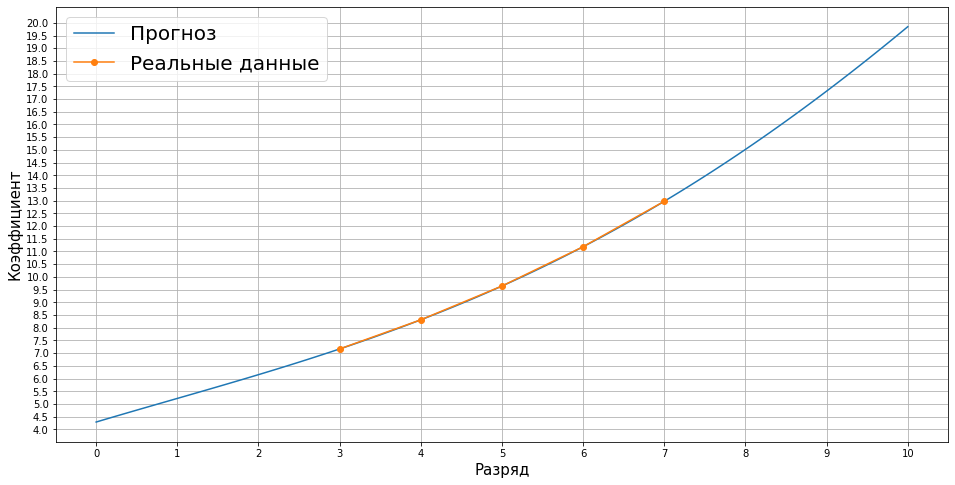

In [13]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.set_xlabel('Разряд', fontsize=15)
ax.set_ylabel('Коэффициент', fontsize=15)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(3, 20.5, 0.5))

ax.plot(plotX[0], plotY, label='Прогноз')
ax.plot(skill[0], coefficient, 'o-', label='Реальные данные')
plt.legend(loc="upper left", fontsize=20)
plt.grid()
plt.show()